In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [2]:
df=pd.read_csv('covid.csv')
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [3]:
df.shape

(23688, 5)

In [4]:
#checking null values
df.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

there are two null values present so we simply drop it

In [5]:
df.dropna(inplace=True)

In [6]:
df.shape

(23688, 5)

In [7]:
df.describe()

,Confirmed,Recovered,Deaths
count,2.368800e+04,23688.000000,23688.000000
mean,7.969368e+03,2581.801714,526.935030
std,5.842109e+04,15143.101257,3992.815956
min,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000,0.000000
50%,1.800000e+01,1.000000,0.000000
75%,7.300000e+02,123.000000,13.000000
max,1.680913e+06,384902.000000,98913.000000


OBservations:
    1)Max deaths world wide are 4825
    2)average deaths are nearly 15 per day
    

In [8]:
df["active"]=df["Confirmed"]-df["Deaths"]-df["Recovered"] #created a column with active  cases

In [9]:
top=df[df["Date"]==df["Date"].max()]
world=top.groupby("Country")["Confirmed","active","Deaths"].sum().reset_index()
world.head()

,Country,Confirmed,active,Deaths
0,Afghanistan,11831,10483,220
1,Albania,1029,193,33
2,Algeria,8697,3162,617
3,Andorra,763,36,51
4,Angola,70,48,4


In [10]:
#renaming columns for easy usage
df.rename(columns={"Date":"date","Country":"country","Confirmed":"confirmed","Deaths":"deaths","Recovered":"recovered"},inplace=True)

[Text(0, 0.5, 'total cases'), Text(0.5, 0, 'Dates')]

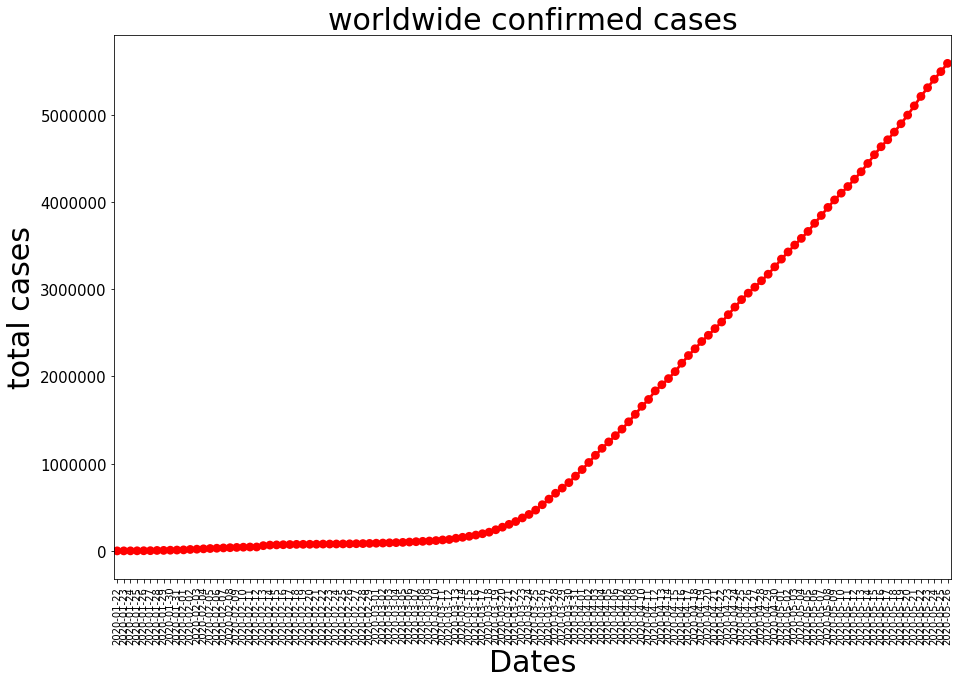

In [11]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel("Dates",fontsize=30)
plt.ylabel("total cases",fontsize=30)
plt.title("worldwide confirmed cases",fontsize=30)
total_cases=df.groupby("date")["date","confirmed"].sum().reset_index()
total_cases["date"]=pd.to_datetime(total_cases["date"])

ax=sns.pointplot(x=total_cases.date.dt.date,y=total_cases.confirmed,color="r")
ax.set(xlabel="Dates",ylabel="total cases")


the no. of confirmed cases are exponentially increases as time goes on

[Text(0, 0.5, 'country'), Text(0.5, 0, 'total cases')]

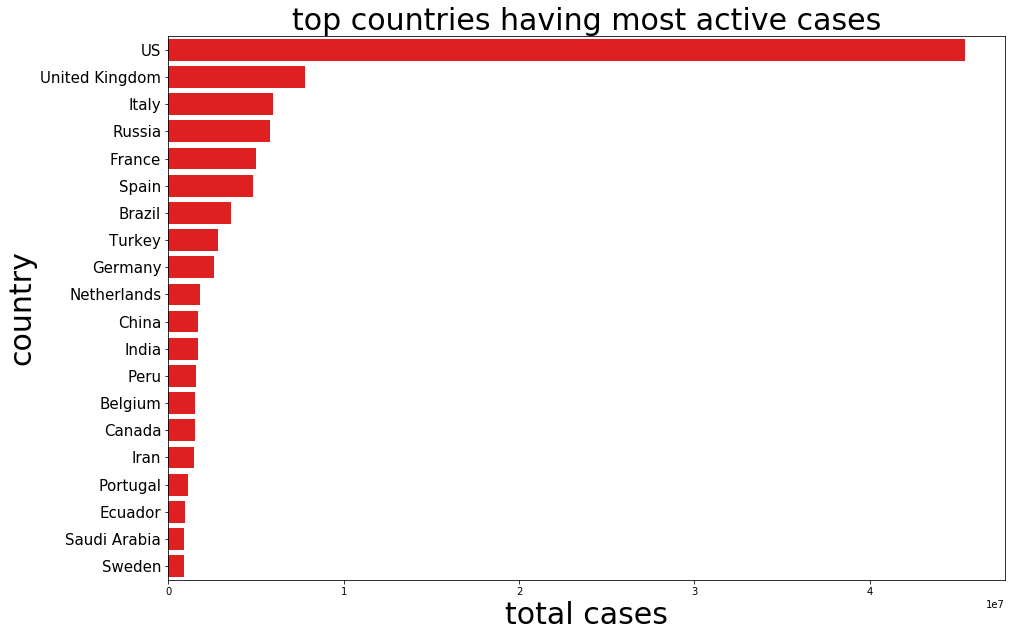

In [12]:
#lets check the active cases
plt.figure(figsize=(15,10))
plt.xticks(fontsize=10)
plt.yticks(fontsize=15)
plt.ylabel("Country",fontsize=30)
plt.xlabel("total cases",fontsize=30)
plt.title("top countries having most active cases",fontsize=30)
top_actives=df.groupby(by="country")["active"].sum().sort_values(ascending=False).head(20).reset_index()


ax=sns.barplot(x=top_actives.active,y=top_actives.country,color="r")
ax.set(ylabel="country",xlabel="total cases")


#china was having more active cases followed by italy and south korea

[Text(0, 0.5, 'country'), Text(0.5, 0, 'total cases')]

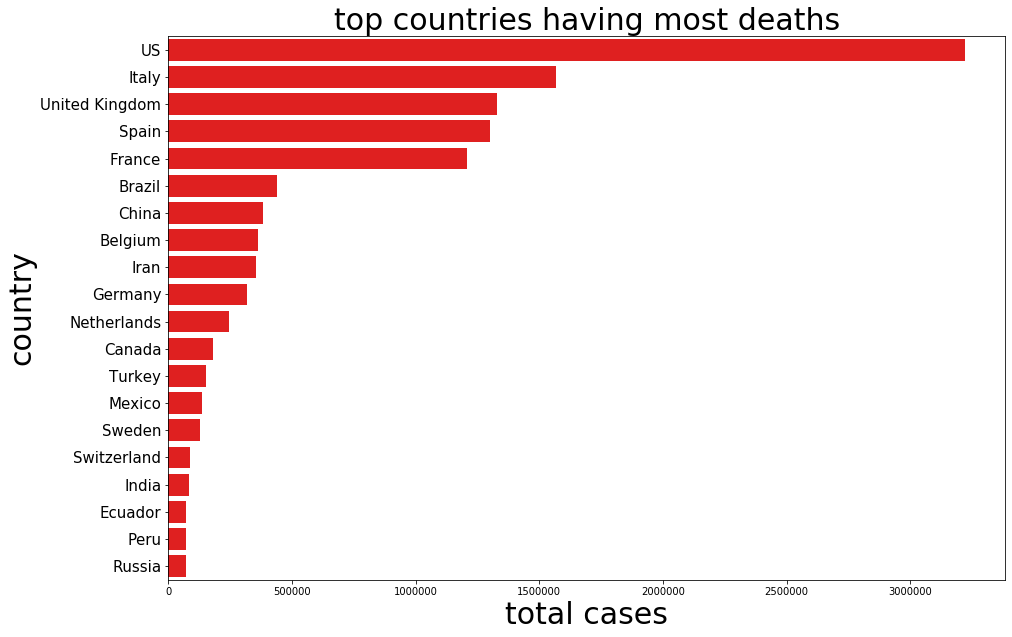

In [13]:
#lets check deaths
plt.figure(figsize=(15,10))
plt.xticks(fontsize=10)
plt.yticks(fontsize=15)
plt.ylabel("Country",fontsize=30)
plt.xlabel("total cases",fontsize=30)
plt.title("top countries having most deaths",fontsize=30)
top_actives=df.groupby(by="country")["deaths"].sum().sort_values(ascending=False).head(20).reset_index()


ax=sns.barplot(x=top_actives.deaths,y=top_actives.country,color="r")
ax.set(ylabel="country",xlabel="total cases")


death rate also more in china then followed by italy and iran

[Text(0, 0.5, 'country'), Text(0.5, 0, 'total cases')]

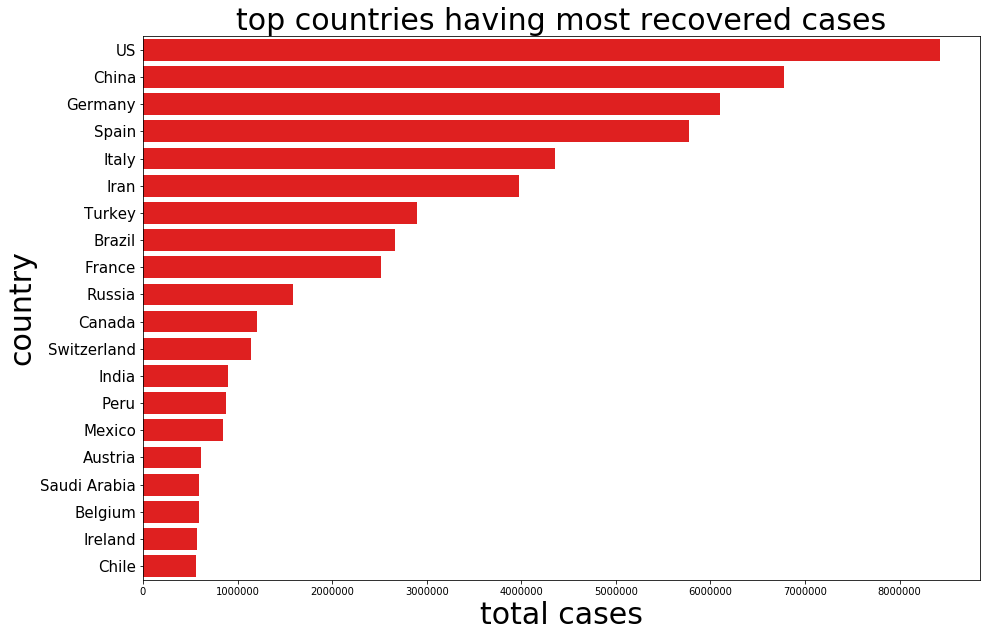

In [14]:
#lets check for recovered
plt.figure(figsize=(15,10))
plt.xticks(fontsize=10)
plt.yticks(fontsize=15)
plt.ylabel("Country",fontsize=30)
plt.xlabel("total cases",fontsize=30)
plt.title("top countries having most recovered cases",fontsize=30)
top_actives=df.groupby(by="country")["recovered"].sum().sort_values(ascending=False).head(20).reset_index()


ax=sns.barplot(x=top_actives.recovered,y=top_actives.country,color="r")
ax.set(ylabel="country",xlabel="total cases")


recovery rate is high in china

In [15]:
china=df[df.country=="China"]
china=china.groupby(by="date")["recovered",'deaths','confirmed','active'].sum().reset_index()

In [16]:
US=df[df.country=="US"]
US=US.groupby(by="date")["recovered",'deaths','confirmed','active'].sum().reset_index()

In [17]:
Italy=df[df.country=="Italy"]
Italy=Italy.groupby(by="date")["recovered",'deaths','confirmed','active'].sum().reset_index()

In [18]:
India=df[df.country=="India"]
India=India.groupby(by="date")["recovered",'deaths','confirmed','active'].sum().reset_index()

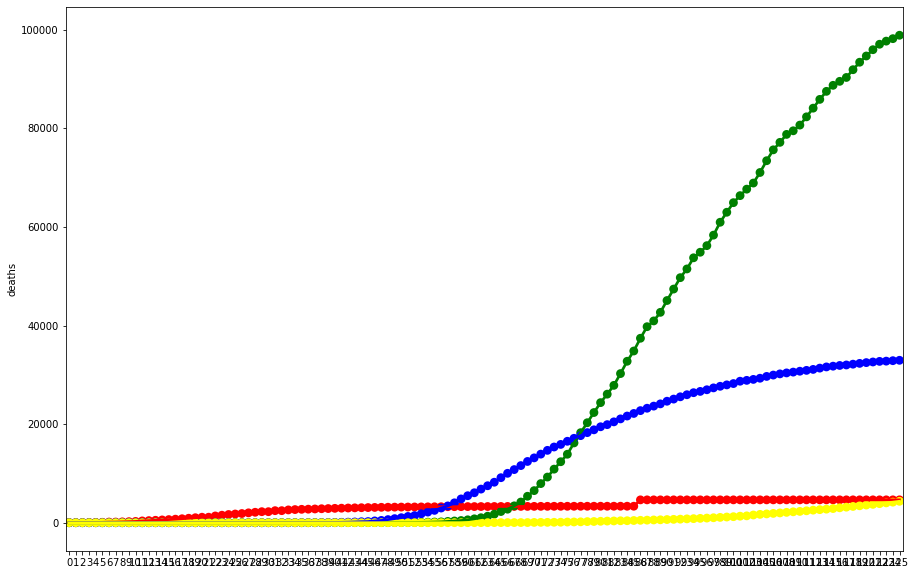

In [19]:
# checking deaths in four countries
plt.figure(figsize=(15,10))
sns.pointplot(china.index,china.deaths,color="Red")
sns.pointplot(US.index,US.deaths,color="Green")
sns.pointplot(Italy.index,Italy.deaths,color="Blue")
sns.pointplot(India.index,India.deaths,color="Yellow")
plt.show()

in india deaths are less as compared to other

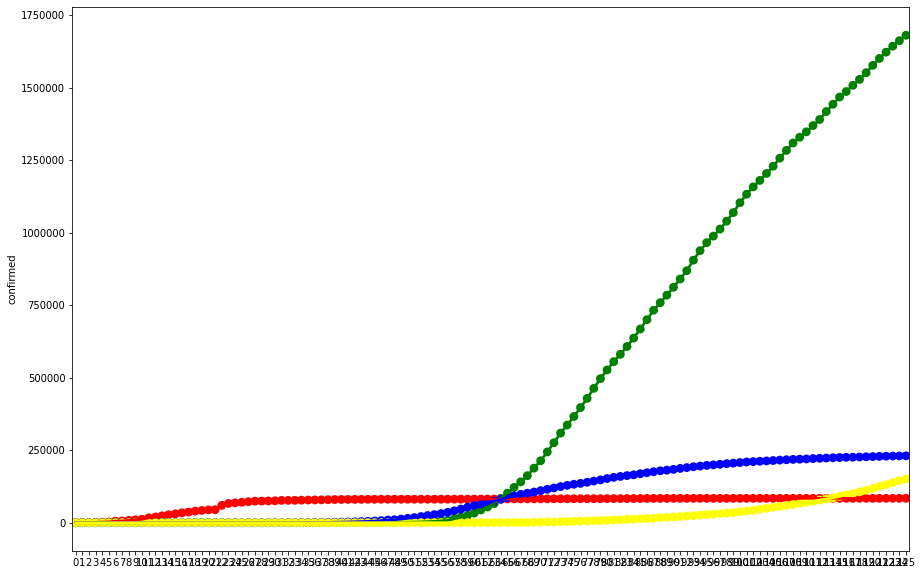

In [20]:

# checking confirmed cases in four countries
plt.figure(figsize=(15,10))
sns.pointplot(china.index,china.confirmed,color="Red")
sns.pointplot(US.index,US.confirmed,color="Green")
sns.pointplot(Italy.index,Italy.confirmed,color="Blue")
sns.pointplot(India.index,India.confirmed,color="Yellow")
plt.show()

#china was having more confirmed cases

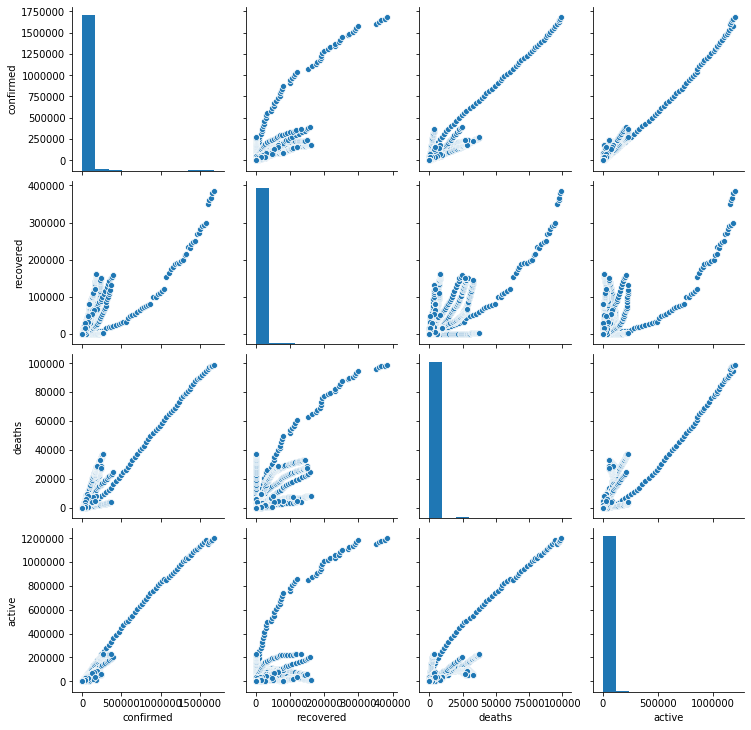

In [21]:
sns.pairplot(df)

In [22]:
df.head()

,date,country,confirmed,recovered,deaths,active
0,2020-01-22,Afghanistan,0,0,0,0
1,2020-01-22,Albania,0,0,0,0
2,2020-01-22,Algeria,0,0,0,0
3,2020-01-22,Andorra,0,0,0,0
4,2020-01-22,Angola,0,0,0,0


In [23]:
da=pd.to_datetime(df['date'],errors='coerce')
df['date']=da.dt.strftime("%Y%m%d").astype(int)

In [24]:
df.shape

(23688, 6)

In [25]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
df1=df.iloc[:,1].values
df.iloc[:,1]=l.fit_transform(df1.astype(str))

In [26]:
df.head()

,date,country,confirmed,recovered,deaths,active
0,20200122,0,0,0,0,0
1,20200122,1,0,0,0,0
2,20200122,2,0,0,0,0
3,20200122,3,0,0,0,0
4,20200122,4,0,0,0,0


In [27]:
df.columns

Index(['date', 'country', 'confirmed', 'recovered', 'deaths', 'active'], dtype='object')

In [28]:
x=df.loc[:,['date', 'country', 'confirmed', 'recovered', 'active']]

In [29]:
x.head()

,date,country,confirmed,recovered,active
0,20200122,0,0,0,0
1,20200122,1,0,0,0
2,20200122,2,0,0,0
3,20200122,3,0,0,0
4,20200122,4,0,0,0


In [30]:
y=df[["deaths"]]

In [31]:
y.shape

(23688, 1)

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [33]:
#feature scaling
#standardising the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [34]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print("r2 score:",r2_score(y_test,y_pred))
print("mean squared error:",mean_squared_error(y_test,y_pred))
print("RSME:",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score: 0.9882762283219834
mean squared error: 215625.10124940376
RSME: 464.3544995468481


In [36]:
from sklearn.model_selection import cross_val_score
lrscores=cross_val_score(lr,x,y,cv=5)
print(lrscores)
print(lrscores.mean())

[1. 1. 1. 1. 1.]
1.0


In [35]:
#saving a model
from sklearn.externals import joblib
joblib.dump(lr,"covid.pkl")

['covid.pkl']